### Reading the important libraries

In [36]:
import pandas as pd 
import texthero as hero
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset 

In [26]:
data=pd.read_csv('Movie Reviews.csv')

In [27]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Text(0.5, 1.0, 'Distribution of sentiments')

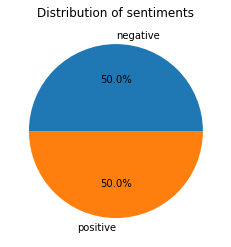

In [39]:
no_counts=data['sentiment'].value_counts()
plt.pie(no_counts.values,labels=no_counts.index,autopct='%1.1f%%')
plt.title('Distribution of sentiments')

### Cleaning the dataset with single library texthero , we can clean data easily and fastly

In [28]:
data['text_preprocessing']=hero.clean(data['review'])

### Seperating the x and y variables

In [6]:
x=data['text_preprocessing'].values
y=data['sentiment'].values

### Splitting the dataset into training and testing purpose(with 70 percent as training and 30 percent as testing )

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000,)
(15000,)
(35000,)
(15000,)


### Making the pipeline for making the model (with logistic regression)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
tfidf=TfidfVectorizer()
logistic=LogisticRegression()
model_logistic=Pipeline([('vectorizer',tfidf),('classifier',logistic)])
model_logistic.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [10]:
y_pred=model_logistic.predict(x_test)

<AxesSubplot:>

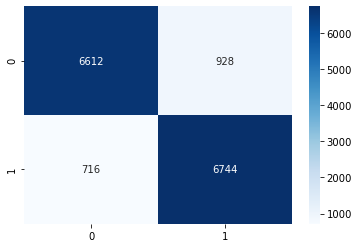

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

In [32]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.8904

In [33]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n    negative       0.90      0.88      0.89      7540\n    positive       0.88      0.90      0.89      7460\n\n    accuracy                           0.89     15000\n   macro avg       0.89      0.89      0.89     15000\nweighted avg       0.89      0.89      0.89     15000\n'

### Making the pipeline for model( with random forest classifier)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
tfidf=TfidfVectorizer()
rfc=RandomForestClassifier(n_estimators=50)
model_rfc=Pipeline([('vectorizer',tfidf),('classifier',rfc)])
model_rfc.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [22]:
y_pred_rfc=model_rfc.predict(x_test)

<AxesSubplot:>

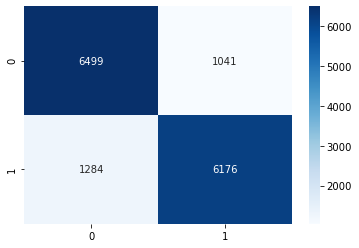

In [23]:
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_rfc,annot=True,cmap='Blues',fmt='g')

In [34]:
from sklearn.metrics import accuracy_score
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_rfc

0.845

In [35]:
from sklearn.metrics import classification_report
cr_rfc=classification_report(y_test,y_pred_rfc)
cr_rfc

'              precision    recall  f1-score   support\n\n    negative       0.84      0.86      0.85      7540\n    positive       0.86      0.83      0.84      7460\n\n    accuracy                           0.84     15000\n   macro avg       0.85      0.84      0.84     15000\nweighted avg       0.85      0.84      0.84     15000\n'

 #### Logistic regression - 89 percent accurate 
 #### Random forest - 84.5 percent accurate 

I have tried only 2 algorithms , but you can try all the classification algorithms 

# Thank You !!